**Cat vs Dog classification model using cv and tensorflow**

#####Downloading the Data form Kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:04<00:00, 219MB/s]
100% 812M/812M [00:04<00:00, 196MB/s]


#### Importing the zipfile so that we can extract the downloaded data from kaggle

In [ ]:
from zipfile import ZipFile


##### Extracting the downloaded dataset

In [ ]:
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 
  print("The dataset is Extracted")

The dataset is Extracted


Extracting the train dataset

In [ ]:

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall() 
  print("The train dataset is Extracted")

The train dataset is Extracted


count the total files in a path of train dataset

In [ ]:
import os
path, dirs, files = next(os.walk('/content/train'))
total_file = len(files)
print("Total Files are :",total_file) 

Total Files are : 25000


looking for file name in a dataset

In [ ]:
file_name = os.listdir('/content/train')
print(file_name)

['dog.3060.jpg', 'dog.3997.jpg', 'dog.1234.jpg', 'dog.7420.jpg', 'cat.1387.jpg', 'dog.12353.jpg', 'cat.7833.jpg', 'cat.7356.jpg', 'dog.9621.jpg', 'dog.11914.jpg', 'cat.9036.jpg', 'dog.6477.jpg', 'dog.8108.jpg', 'cat.7395.jpg', 'cat.3864.jpg', 'cat.9586.jpg', 'cat.6145.jpg', 'cat.153.jpg', 'dog.474.jpg', 'dog.7912.jpg', 'dog.202.jpg', 'dog.3643.jpg', 'cat.10630.jpg', 'dog.6936.jpg', 'dog.3118.jpg', 'dog.1813.jpg', 'cat.4281.jpg', 'dog.4039.jpg', 'cat.11759.jpg', 'dog.8294.jpg', 'cat.12180.jpg', 'dog.6600.jpg', 'dog.7150.jpg', 'cat.9083.jpg', 'cat.1159.jpg', 'dog.7910.jpg', 'dog.8537.jpg', 'dog.6060.jpg', 'dog.4724.jpg', 'cat.10774.jpg', 'cat.4387.jpg', 'cat.3324.jpg', 'cat.8566.jpg', 'dog.9498.jpg', 'dog.3672.jpg', 'cat.7457.jpg', 'dog.9522.jpg', 'cat.1314.jpg', 'dog.11743.jpg', 'cat.1848.jpg', 'dog.8356.jpg', 'cat.2676.jpg', 'dog.7614.jpg', 'cat.11038.jpg', 'cat.5893.jpg', 'dog.10386.jpg', 'dog.869.jpg', 'cat.4253.jpg', 'dog.3467.jpg', 'cat.8992.jpg', 'cat.4379.jpg', 'dog.6949.jpg', 'd

importing requirments

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

to show any image of cat from the data 

In [ ]:
cat_image = mpimage.imread('/content/train/cat.1387.jpg')
plt.imshow(cat_image)

to show any image of dog from the data 

In [ ]:
do_image = mpimage.imread('/content/train/dog.9621.jpg')
plt.imshow(dog_image)

finding the total cats and dogs in dataset

In [ ]:
file_name = os.listdir('/content/train')

total_dogs = 0
total_cats = 0

for image_name in file_name:
  name = image_name[0:3]
  if name == 'dog':
    total_dogs +=1
  else:
    total_cats +=1

print("Total number of dogs:",total_dogs)
print("Total number of cats:",total_cats)

Total number of dogs: 12500
Total number of cats: 12500


creating new directory so that our re-sized image will be saved there

In [ ]:
os.mkdir('/content/images_resized')
resized_folder = '/content/images_resized/'

In [ ]:

orignal_folder = '/content/train/'


saving the re-sized images in new folder

In [ ]:
for i in range(2000):
  file_index = os.listdir(orignal_folder)[i]
  image_path = orignal_folder + file_index

  each_image = Image.open(image_path)
  each_image = each_image.resize((224,224))
  each_image = each_image.convert('RGB')

  new_path = resized_folder + file_index

  each_image.save(new_path)




labelizing the oth files ,0 for cat and 1 for dog so that this will be int type

In [ ]:
image_resized_file = os.listdir('/content/images_resized/')

label = []
for i in range(2000):
  label_file = image_resized_file[i]
  #for accessing the first three alphabet of file name(cat,dog)
  index_label = label_file[0:3]

  if index_label == 'dog':
    label.append(1)

  else:
    label.append(0)

print(label[:5])
print(len(label))


[1, 1, 1, 1, 0]
2000


In [ ]:
import glob
import cv2

setting the fixed format

In [ ]:
image_format = ['png','jpg']
files = []

[files.extend(glob.glob(resized_folder + '*.' + e))for e in image_format]

images_array = np.asarray([cv2.imread(file)for file in files])








creating  the x and y entities of array

In [ ]:
x = images_array
y = np.asarray(label)

training and splitting the data(x and y)

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 2)

set the common pixal range ratio for each image of train and test data

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

x_train_scaled[:1]
x_test_scaled[:1]

array([[[[0.54901961, 0.52156863, 0.48627451],
         [0.41960784, 0.4       , 0.36470588],
         [0.36078431, 0.3372549 , 0.30980392],
         ...,
         [0.18039216, 0.14117647, 0.20392157],
         [0.22352941, 0.19215686, 0.25882353],
         [0.21960784, 0.18431373, 0.2627451 ]],

        [[0.57254902, 0.54509804, 0.50980392],
         [0.54901961, 0.52941176, 0.49411765],
         [0.50196078, 0.49019608, 0.45882353],
         ...,
         [0.17254902, 0.14509804, 0.20392157],
         [0.18823529, 0.15686275, 0.22352941],
         [0.21176471, 0.18823529, 0.2627451 ]],

        [[0.54117647, 0.51764706, 0.49019608],
         [0.56862745, 0.55686275, 0.5254902 ],
         [0.57254902, 0.56078431, 0.54117647],
         ...,
         [0.17647059, 0.14901961, 0.20784314],
         [0.15294118, 0.12941176, 0.19607843],
         [0.25882353, 0.24705882, 0.30980392]],

        ...,

        [[0.3254902 , 0.35294118, 0.48235294],
         [0.32941176, 0.35686275, 0.48627451]

In [ ]:
import tensorflow as tf
import tensorflow_hub as tfhub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model_shape = tfhub.KerasLayer(mobilenet_model , input_shape =  (224, 224, 3), trainable = False)

In [ ]:
type_of_images = 2

model = tf.keras.Sequential([
    
    pretrained_model_shape,
    tf.keras.layers.Dense(type_of_images)

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']


)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 53s 955ms/step - loss: 0.1673 - acc: 0.9406
Epoch 2/5
50/50 [==============================] - 47s 949ms/step - loss: 0.0569 - acc: 0.9837
Epoch 3/5
50/50 [==============================] - 49s 985ms/step - loss: 0.0420 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 48s 959ms/step - loss: 0.0325 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 48s 959ms/step - loss: 0.0254 - acc: 0.9956


In [ ]:
score,accuracy = model.evaluate(x_test_scaled , y_test)
print('Loss value : ',score)
print('Accuracy value : ',accuracy)

13/13 [==============================] - 13s 928ms/step - loss: 0.0472 - acc: 0.9850
Loss value :  0.04722418263554573
Accuracy value :  0.9850000143051147


upload the image.../content/cat.jpg


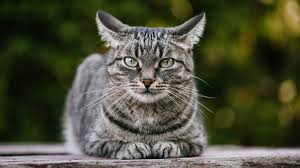

1/1 [==============================] - 0s 69ms/step
This is Cat 


In [ ]:
input_image_path = input("upload the image...")

uploaded_image = cv2.imread(input_image_path)

cv2_imshow(uploaded_image)

uploaded_image_resize = cv2.resize(uploaded_image,(224,224))

resize_image_scaled = uploaded_image_resize/255

image_reshape = np.reshape(resize_image_scaled,[1,224,224,3])

image_prediction = model.predict(image_reshape)

image_label = np.argmax(image_prediction)

if image_label == 1:
  print("This is Dog ")

elif image_label == 0 :

  print("This is Cat ")

else :

  print("Wrong input")






upload the image.../content/dog.jpg


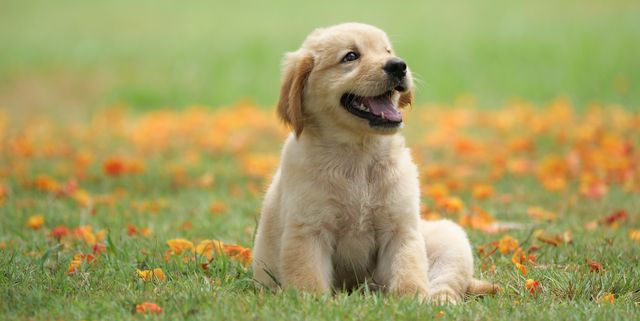

1/1 [==============================] - 0s 84ms/step
This is Dog 


In [ ]:
input_image_path = input("upload the image...")

uploaded_image = cv2.imread(input_image_path)

cv2_imshow(uploaded_image)

uploaded_image_resize = cv2.resize(uploaded_image,(224,224))

resize_image_scaled = uploaded_image_resize/255

image_reshape = np.reshape(resize_image_scaled,[1,224,224,3])

image_prediction = model.predict(image_reshape)

image_label = np.argmax(image_prediction)

if image_label == 1:
  print("This is Dog ")

elif image_label == 0 :

  print("This is Cat ")

else :

  print("Wrong input")






These cat and dog images are downloaded externally not from the data set ,as I download it from google you can also capture any dog or cat image around you from mobile then store in your local directory and upload in your enterpretor mine is google colab, so that you will find the same result for cat or dog.